# Лабораторна робота №6. Застосування numpy.

### Виконала студентка групи ФБ-35 Дедяєва Софія

Мета роботи: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та
градієнтного спуску.

Завдання 1:
1. Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу
результатів.
2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок kk� та bb�.
3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).
4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

МНК: k = 3.993693502140203, b = 3.222151077447233
np.polyfit: k = 3.9936935021402022, b = 3.2221510774472244
Похибка МНК: k = 0.15766244649492167%, b = 7.405035914907761%
Похибка np.polyfit: k = 0.15766244649494388%, b = 7.40503591490748%


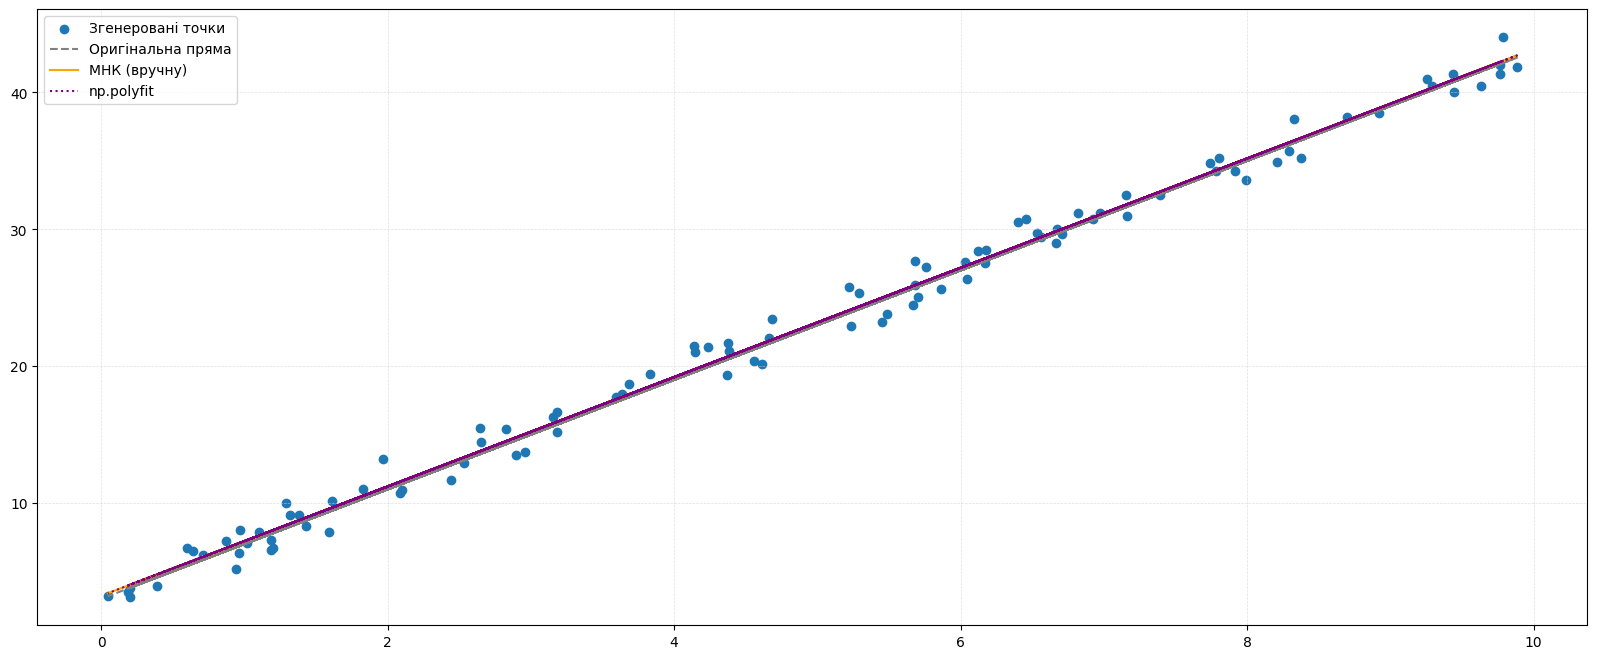

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# створення набору точок
np.random.seed(0)
x_data = np.random.rand(100) * 10
y_data = 4.0 * x_data + 3.0 + np.random.randn(100)

# функція для обчислення параметрів методом МНК
def linear_regression(x_data, y_data):
    x_avg = np.mean(x_data)
    y_avg = np.mean(y_data)

    num = np.sum((x_data - x_avg) * (y_data - y_avg))
    den = np.sum((x_data - x_avg)**2)

    slope = num / den
    offset = y_avg - slope * x_avg

    return slope, offset

slope_lr, offset_lr = linear_regression(x_data, y_data)
slope_np, offset_np = np.polyfit(x_data, y_data, 1)

# обчислення відсоткових похибок
slope_err_lr = np.abs((slope_lr - 4) / 4) * 100
offset_err_lr = np.abs((offset_lr - 3) / 3) * 100
slope_err_np = np.abs((slope_np - 4) / 4) * 100
offset_err_np = np.abs((offset_np - 3) / 3) * 100

print(f'МНК: k = {slope_lr}, b = {offset_lr}')
print(f'np.polyfit: k = {slope_np}, b = {offset_np}')
print(f'Похибка МНК: k = {slope_err_lr}%, b = {offset_err_lr}%')
print(f'Похибка np.polyfit: k = {slope_err_np}%, b = {offset_err_np}%')

plt.figure(figsize=(20, 8))
plt.scatter(x_data, y_data, label='Згенеровані точки')
plt.plot(x_data, 4.0 * x_data + 3.0, color='gray', linestyle='--', label='Оригінальна пряма')
plt.plot(x_data, slope_lr * x_data + offset_lr, color='orange', label='МНК (вручну)')
plt.plot(x_data, slope_np * x_data + offset_np, color='purple', linestyle=':', label='np.polyfit')


plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='lightgray')
plt.show()


Завдання 2:
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок kk� та bb�. Визначіть оптимальні вхідні параметри: learning_rate, n_iter
2. Додайте отриману лінію регресії на загальний графік
4. Порівняйте отримані результати з результатами попереднього завдання

Градієнтний спуск: k = 3.995649087567517, b = 3.2095767306669476
Похибка градієнтного спуску: k = 0.11%, b = 6.99%


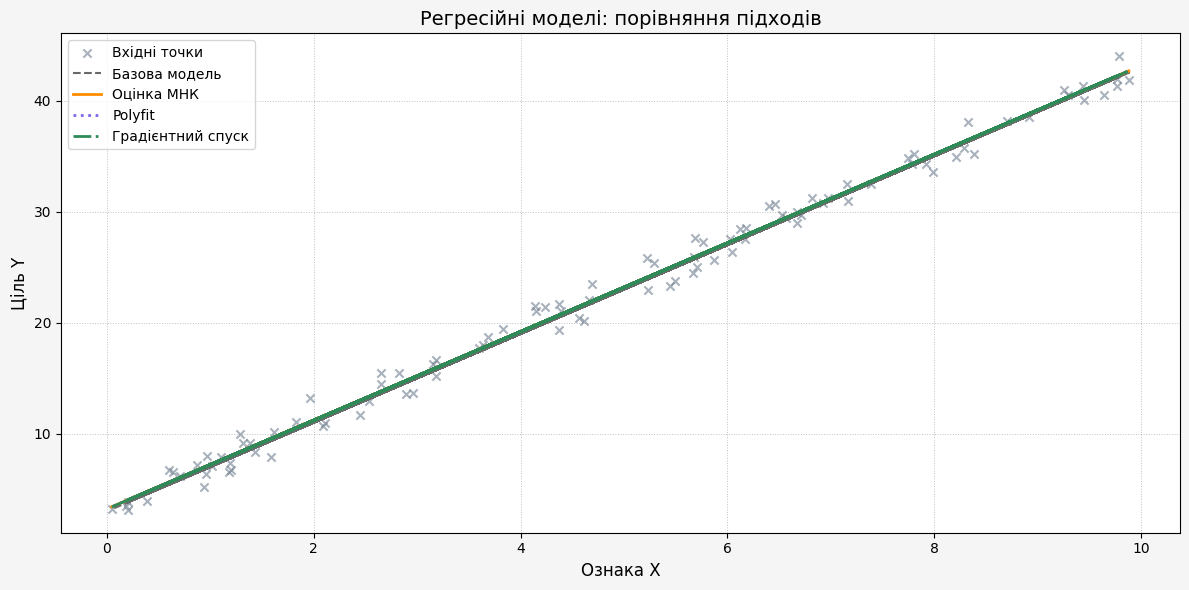

In [3]:
# реалізація градієнтного спуску для підбору параметрів прямої
def gd_fit(x_vals, y_vals, alpha, steps):
    size = len(x_vals)
    coef = 0.0
    shift = 0.0
    mse_list = []

    for _ in range(steps):
        preds = coef * x_vals + shift  # поточні передбачення
        mse = (1 / size) * np.sum((y_vals - preds) ** 2)  # середньоквадратична помилка
        mse_list.append(mse)


        grad_coef = -(2 / size) * np.sum(x_vals * (y_vals - preds))
        grad_shift = -(2 / size) * np.sum(y_vals - preds)


        coef -= alpha * grad_coef
        shift -= alpha * grad_shift

    return coef, shift, mse_list


alpha = 0.01
steps = 1000

k_gd, b_gd, mse_list = gd_fit(x_data, y_data, alpha, steps)
print(f'Градієнтний спуск: k = {k_gd}, b = {b_gd}')


k_gd_error = np.abs((k_gd - 4) / 4) * 100
b_gd_error = np.abs((b_gd - 3) / 3) * 100
print(f'Похибка градієнтного спуску: k = {k_gd_error:.2f}%, b = {b_gd_error:.2f}%')

plt.figure(figsize=(12, 6), facecolor='whitesmoke')

plt.scatter(x_data, y_data, label='Вхідні точки', color='slategray', s=35, alpha=0.6, marker='x')

plt.plot(x_data, 4.0 * x_data + 3.0, color='dimgray', linestyle='--', label='Базова модель')

plt.plot(x_data, slope_lr * x_data + offset_lr, color='darkorange', linewidth=2, label='Оцінка МНК')

plt.plot(x_data, slope_np * x_data + offset_np, color='mediumslateblue', linestyle=':', linewidth=2, label='Polyfit')

plt.plot(x_data, k_gd * x_data + b_gd, color='seagreen', linestyle='-.', linewidth=2, label='Градієнтний спуск')

plt.title("Регресійні моделі: порівняння підходів", fontsize=14)
plt.xlabel("Ознака X", fontsize=12)
plt.ylabel("Ціль Y", fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.7, alpha=0.5, color='gray')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

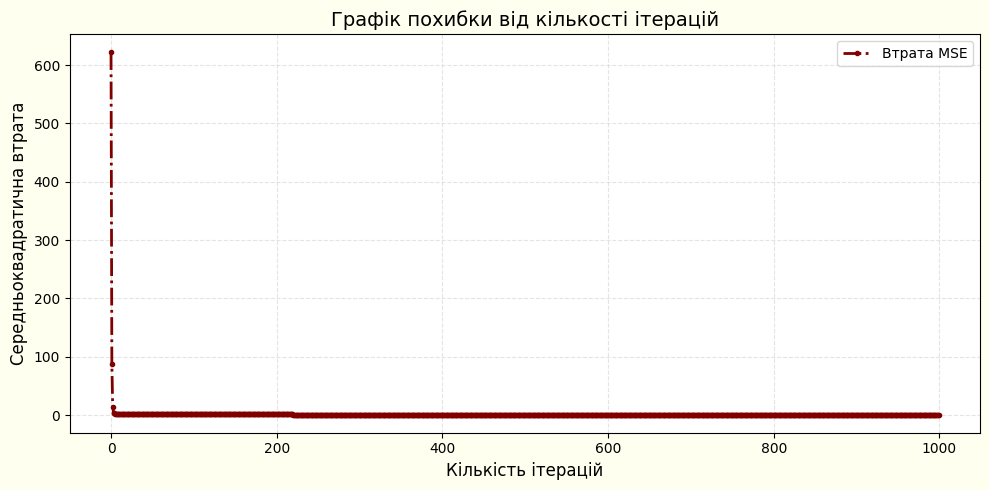

In [5]:
plt.figure(figsize=(10, 5), facecolor='ivory')
plt.plot(range(steps), mse_list, color='maroon', linestyle='-.', linewidth=2, marker='o', markersize=3, label='Втрата MSE')

plt.xlabel('Кількість ітерацій', fontsize=12)
plt.ylabel('Середньоквадратична втрата', fontsize=12)
plt.title('Графік похибки від кількості ітерацій', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6, color='lightgray')
plt.legend()
plt.tight_layout()
plt.show()
